In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [100]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')
all_df = pd.concat([train_df, test_df]).reset_index()

In [101]:
all_df['group'] = [int(s[:4]) for s in all_df.PassengerId]

In [102]:
all_df['last_name'] = [names.split(' ')[1] if isinstance(names, str) else names for names in all_df['Name']]

In [103]:
group_sim = ['HomePlanet','Cabin','Destination','last_name']

for col in group_sim:
    all_df[col] = all_df.groupby('group')[col].transform(lambda x: x.fillna(method='ffill'))
    all_df[col] = all_df[col].transform(lambda x: x.fillna(method='bfill'))

In [104]:
cost_col = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in cost_col :
    all_df[col] = all_df[col].fillna(0)

In [105]:
all_df['spend_fillna_0'] = all_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis = 1)

In [106]:
all_df['VIP_fill_na_False'] = all_df['VIP'].fillna(False)

In [107]:
all_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','spend_fillna_0','CryoSleep']].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,spend_fillna_0,CryoSleep
0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,109.0,9.0,25.0,549.0,44.0,736.0,False
2,43.0,3576.0,0.0,6715.0,49.0,10383.0,False
3,0.0,1283.0,371.0,3329.0,193.0,5176.0,False
4,303.0,70.0,151.0,565.0,2.0,1091.0,False


In [108]:
for idx, a in enumerate(all_df['CryoSleep']) :
    if np.isnan(a) :
        if all_df['spend_fillna_0'][idx] == 0:
            all_df.loc[idx, 'CryoSleep'] = True
        else :
            all_df.loc[idx, 'CryoSleep'] = False

In [109]:
deck = []
num = []
side = []

for i in all_df.Cabin :
    if str(i).find('/') >= 0 :
        try :
            d,n,s = str(i).split('/')
            deck.append(d)
            num.append(int(n))
            side.append(s)
        except :
            print(i)
            break
    else: 
        print(i)
        deck.append(np.nan)
        num.append(np.nan)
        side.append(np.nan)

all_df['deck'] = deck
all_df['num'] = num
all_df['side'] = side

In [115]:
all_df[all_df['deck']=='nan']

,index,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,last_name,spend_fillna_0,VIP_fill_na_False,deck,num,side


In [ ]:
all_df['deck'].fillna(all_df['deck'].mode()[0], inplace=True)
all_df['num'].fillna(all_df['num'].mode()[0], inplace=True)
all_df['side'].fillna(all_df['side'].mode()[0], inplace=True)

In [110]:
# 최종적으로 버릴 변수 PassengerId, VIP, Name, Cabin

col_drop = ['PassengerId', 'VIP', 'Name', 'Cabin']
all_df.drop(columns=col_drop, inplace=True)
all_df['Age'].fillna(np.median(all_df['Age']),inplace=True)


In [248]:
# y = df['Transported']
# df = df.drop('Transported', axis=1)

In [249]:
for col in df.columns :
    print(col,"\n", df[col].unique())
    print('유니크한 카테고리 수 : ',len(df[col].unique()))
    print('null 수              : ', df[col].isna().sum(),"\n")

HomePlanet 
 ['Europa' 'Earth' 'Mars']
유니크한 카테고리 수 :  3
null 수              :  0 

CryoSleep 
 [False True]
유니크한 카테고리 수 :  2
null 수              :  0 

Destination 
 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
유니크한 카테고리 수 :  3
null 수              :  0 

Age 
 [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
유니크한 카테고리 수 :  81
null 수              :  179 

RoomService 
 [   0.  109.   43. ... 1569. 8586.  745.]
유니크한 카테고리 수 :  1273
null 수              :  0 

FoodCourt 
 [   0.    9. 3576. ... 3208. 6819. 4688.]
유니크한 카테고리 수 :  1507
null 수              :  0 

ShoppingMall 
 [   0.   25.  371. ... 1085.  510. 1872.]
유니크한 카테고리 수 :  1115
null 수              :  0 

Spa 
 [   0.  549. 6715. ... 2868. 1107. 1643.]
유니크한 

In [251]:
for col in df2.columns :
    print(col,"\n", df2[col].unique())
    print('유니크한 카테고리 수 : ',len(df2[col].unique()))
    print('null 수              : ', df2[col].isna().sum(),"\n")

HomePlanet 
 ['Earth' 'Europa' 'Mars']
유니크한 카테고리 수 :  3
null 수              :  0 

CryoSleep 
 [True False]
유니크한 카테고리 수 :  2
null 수              :  0 

Destination 
 ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22']
유니크한 카테고리 수 :  3
null 수              :  0 

Age 
 [27. 19. 31. 38. 20. 21. 23. 24. 45. 44. 46. 29. 40. 30. 14. 66. 36. 18.
 26. 48.  6. 33. nan  1. 17. 34.  5. 22. 16.  7.  2.  0. 56. 39. 35.  8.
  3.  9. 25. 42. 50. 41. 32. 49. 55. 60. 47. 58. 28. 12. 52. 15. 43. 54.
 70. 37. 59. 61. 63. 53.  4. 10. 65. 13. 51. 79. 74. 67. 69. 57. 72. 75.
 11. 73. 71. 64. 62. 78. 77. 68.]
유니크한 카테고리 수 :  80
null 수              :  91 

RoomService 
 [0.0000e+00 1.0000e+01 3.3900e+02 9.3200e+02 2.0000e+00 2.6000e+01
 3.9000e+01 1.7840e+03 2.9300e+02 5.9800e+02 1.4000e+01 4.8300e+02
 6.6000e+01 1.0000e+00 1.0370e+03 3.9660e+03 4.6000e+01 4.1300e+02
 3.7800e+02 3.2000e+01 8.3200e+02 3.6200e+02 7.5600e+02 1.9700e+02
 6.0000e+00 2.6100e+02 1.6690e+03 4.4000e+01 3.3000e+01 7.1700e+02
 4.7620e+03 7.410

VIP_fill_na_False 
 [False  True]
유니크한 카테고리 수 :  2
null 수              :  0 

deck 
 ['G' 'F' 'C' 'B' 'D' 'E' 'A' 'T']
유니크한 카테고리 수 :  8
null 수              :  0 

num 
 [   3    4    0 ... 1890 1794 1503]
유니크한 카테고리 수 :  1505
null 수              :  0 

side 
 ['S' 'P']
유니크한 카테고리 수 :  2
null 수              :  0 



In [253]:
from sklearn.preprocessing import LabelEncoder

encoder_col = ['HomePlanet', 'CryoSleep', 'Destination','last_name','VIP_fill_na_False', 'deck','side']
encoder = LabelEncoder()

# LabelEncoder를 객체로 생성
encoder_HomePlanet = LabelEncoder()
# fit, transform 메소드를 통한 레이블 인코딩
df['HomePlanet'] = encoder_HomePlanet.fit_transform(df['HomePlanet'])
df2['HomePlanet'] = encoder_HomePlanet.transform(df2['HomePlanet'])

# LabelEncoder를 객체로 생성
encoder_CryoSleep = LabelEncoder()
# fit, transform 메소드를 통한 레이블 인코딩
df['CryoSleep'] = encoder_CryoSleep.fit_transform(df['CryoSleep'])
df2['CryoSleep'] = encoder_CryoSleep.transform(df2['CryoSleep'])

# LabelEncoder를 객체로 생성
encoder_Destination = LabelEncoder()
# fit, transform 메소드를 통한 레이블 인코딩
df['Destination'] = encoder_Destination.fit_transform(df['Destination'])
df2['Destination'] = encoder_Destination.transform(df2['Destination'])

# LabelEncoder를 객체로 생성
encoder_last_name = LabelEncoder()
# fit, transform 메소드를 통한 레이블 인코딩
df['last_name'] = encoder_last_name.fit_transform(df['last_name'])
df2['last_name'] = df2['last_name'].apply(lambda x: encoder_last_name.transform([x])[0] if x in encoder_last_name.classes_ else 0)

# LabelEncoder를 객체로 생성
encoder_deck = LabelEncoder()
# fit, transform 메소드를 통한 레이블 인코딩
df['deck'] = encoder_deck.fit_transform(df['deck'])
df2['deck'] = encoder_deck.transform(df2['deck'])

encoder_side = LabelEncoder()
# fit, transform 메소드를 통한 레이블 인코딩
df['side'] = encoder_side.fit_transform(df['side'])
df2['side'] = encoder_side.transform(df2['side'])


df['VIP_fill_na_False'] = df['VIP_fill_na_False'].astype(int)
df2['VIP_fill_na_False'] = df2['VIP_fill_na_False'].astype(int)




In [254]:
df.corr()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,last_name,spend_fillna_0,VIP_fill_na_False,deck,num,side
HomePlanet,1.000000,0.088953,0.039393,0.134480,0.212442,0.068821,0.101507,0.053451,0.040193,0.116881,-0.004601,0.004435,0.148622,0.124166,-0.410312,-0.198557,0.001229
CryoSleep,0.088953,1.000000,-0.094802,-0.078192,-0.250173,-0.211061,-0.212977,-0.203249,-0.197524,0.467230,-0.004304,0.014009,-0.386081,-0.081318,0.016910,-0.036606,0.018982
Destination,0.039393,-0.094802,1.000000,-0.005453,0.046382,-0.110375,0.025525,-0.056524,-0.072374,-0.110135,-0.003366,-0.015588,-0.098442,-0.044469,0.187318,0.102247,-0.011132
Age,0.134480,-0.078192,-0.005453,1.000000,0.068785,0.128464,0.032949,0.122865,0.100213,-0.075026,-0.009439,0.004729,0.186530,0.091822,-0.247145,-0.133925,0.011096
RoomService,0.212442,-0.250173,0.046382,0.068785,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,0.000375,-0.016133,0.234374,0.056566,-0.030345,-0.013001,-0.009727
FoodCourt,0.068821,-0.211061,-0.110375,0.128464,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,-0.009200,0.012275,0.742608,0.125499,-0.317544,-0.179688,0.016528
ShoppingMall,0.101507,-0.212977,0.025525,0.032949,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,0.017796,0.001924,0.220529,0.018412,-0.030913,0.002405,-0.018390
Spa,0.053451,-0.203249,-0.056524,0.122865,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,-0.005198,0.001100,0.592656,0.060991,-0.222740,-0.129796,0.002587
VRDeck,0.040193,-0.197524,-0.072374,0.100213,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,0.015945,0.007743,0.585684,0.123061,-0.251901,-0.134377,-0.009258
Transported,0.116881,0.467230,-0.110135,-0.075026,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,0.021491,0.015370,-0.199514,-0.037261,-0.117590,-0.046512,0.103359


In [255]:
df2

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,last_name,spend_fillna_0,VIP_fill_na_False,deck,num,side
0,0,1,2,27.0,0.0,0.0,0.0,0.0,0.0,13,344,0.0,0,6,3,1
1,0,0,2,19.0,0.0,9.0,0.0,2823.0,0.0,18,1505,2832.0,0,5,4,1
2,1,1,0,31.0,0.0,0.0,0.0,0.0,0.0,19,2070,0.0,0,2,0,1
3,1,0,2,38.0,0.0,6652.0,0.0,181.0,585.0,21,324,7418.0,0,2,1,1
4,0,0,2,20.0,10.0,0.0,635.0,0.0,0.0,23,926,645.0,0,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.0,0.0,0.0,0.0,0.0,0.0,9266,1531,0.0,0,6,1496,1
4273,0,0,2,42.0,0.0,847.0,17.0,10.0,144.0,9269,1791,1018.0,0,3,296,0
4274,2,1,0,NaN,0.0,0.0,0.0,0.0,0.0,9271,0,0.0,0,3,296,0
4275,1,0,1,NaN,0.0,2680.0,0.0,0.0,523.0,9273,457,3203.0,0,3,297,0


In [279]:
# col = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
#        'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'group', 'last_name',
#        'spend_fillna_0', 'VIP_fill_na_False', 'deck', 'num', 'side']


y = df['Transported']
df = df.drop('Transported', axis=1)


KeyError: 'Transported'

In [298]:
# col = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
#        'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'group', 'last_name',
#        'spend_fillna_0', 'VIP_fill_na_False', 'deck', 'num', 'side']

col = ['HomePlanet', 'CryoSleep', 'Destination', 'RoomService',
       'FoodCourt',  'Spa', 'VRDeck', 'group', 'last_name',
       'spend_fillna_0', 'VIP_fill_na_False', 'deck', 'num', 'side']

df_ = df.loc[:,col]
df2_ = df2.loc[:,col]

X_train = np.array(df_)
y_train = np.array(y)

X_test = np.array(df2_)

In [299]:
df_

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,last_name,spend_fillna_0,VIP_fill_na_False,deck,num,side
0,1,0,2,0.0,0.0,0.0,0.0,0.0,1,1431,0.0,0,1,0,0
1,0,0,2,109.0,9.0,25.0,549.0,44.0,2,2109,736.0,0,5,0,1
2,1,0,2,43.0,3576.0,0.0,6715.0,49.0,3,1990,10383.0,1,0,0,1
3,1,0,2,0.0,1283.0,371.0,3329.0,193.0,3,1990,5176.0,0,0,0,1
4,0,0,2,303.0,70.0,151.0,565.0,2.0,4,1778,1091.0,0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0.0,6819.0,0.0,1643.0,74.0,9276,1416,8536.0,1,0,98,0
8689,0,1,1,0.0,0.0,0.0,0.0,0.0,9278,1341,0.0,0,6,1499,1
8690,0,0,2,0.0,0.0,1872.0,1.0,0.0,9279,470,1873.0,0,6,1500,1
8691,1,0,0,0.0,1049.0,0.0,353.0,3235.0,9280,996,4637.0,0,4,608,1


In [300]:
X_train.shape
 
X_test.shape

(4277, 15)

In [301]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler() 

# scaler.fit(X_train) 
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [302]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=12) # 주성분을 몇개로 할지 결정
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)
# print(np.cumsum(pca.explained_variance_ratio_)[-1])

In [303]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size=0.8,random_state=32, shuffle=True, stratify=y)

In [304]:
# from sklearn.model_selection import train_test_split

# X_train,X_val,y_train,y_val = train_test_split(X_train_pca,y_train,train_size=0.2,random_state=32, shuffle=True, stratify=y)

In [305]:
X_train.shape

(6954, 15)

In [ ]:
## 왜 AGE를 빼야 학습이 진행되는가?

In [307]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

model = tf.keras.Sequential()
model.add(layers.Dense(12, input_shape=(X_train.shape[1],), 
                       activation='relu', 
                       kernel_regularizer=tf.keras.regularizers.l1(0.001),
                       kernel_initializer='he_normal'
                      ))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(30, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001),
                       kernel_initializer='he_normal'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))


model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 6, mode = 'auto')


history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    callbacks = [early_stopping]
                   )



Epoch 1/100
435/435 [==============================] - 4s 5ms/step - loss: 0.7033 - binary_accuracy: 0.7010 - val_loss: 0.6461 - val_binary_accuracy: 0.6987
Epoch 2/100
435/435 [==============================] - 2s 4ms/step - loss: 0.6083 - binary_accuracy: 0.7479 - val_loss: 0.5707 - val_binary_accuracy: 0.7941
Epoch 3/100
435/435 [==============================] - 2s 4ms/step - loss: 0.5827 - binary_accuracy: 0.7514 - val_loss: 0.5511 - val_binary_accuracy: 0.7769
Epoch 4/100
435/435 [==============================] - 2s 4ms/step - loss: 0.5740 - binary_accuracy: 0.7506 - val_loss: 0.5445 - val_binary_accuracy: 0.7855
Epoch 5/100
435/435 [==============================] - 2s 4ms/step - loss: 0.5626 - binary_accuracy: 0.7587 - val_loss: 0.5706 - val_binary_accuracy: 0.7918
Epoch 6/100
435/435 [==============================] - 2s 4ms/step - loss: 0.5625 - binary_accuracy: 0.7617 - val_loss: 0.5740 - val_binary_accuracy: 0.7855
Epoch 7/100
435/435 [==============================] - 2s 

KeyboardInterrupt: 

In [ ]:
#?? 근데 왜 난 여지껏 트레인 비율을 0.2로 한거임?

# layer 3층 64,64,1, 배치사이즈 16, 각 레이어에 l1규제 (0.001), 레이어 사이 배치정규화, dropout(0.3) 적용. -> val 성능 79%
# layer 4층 8,64,64,1, 배치사이즈 16, 각 레이어에 l1규제 (0.001), 레이어 사이 배치정규화, dropout(0.2) 적용. -> val 성능 79.47%
# 쓸데없는 변수는 버려야 하나?
# 변수간의 상관성이 아마 매우 클텐데
# layer 4층 8,12,12,1, 배치사이즈 16, 각 레이어에 l2규제 (0.001), 레이어 사이 배치정규화, dropout(0.2) 적용. -> val 성능 79.30% 오히려 train loss 매우 흔들림
# layer 4층 4,96,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.001), 레이어 사이 배치정규화, dropout(0.2) 적용. -> val 성능 77.70% train loss, val loss 매우 흔들림
# layer 4층 4,64,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.001), 배치정규화 삭제, dropout(0.2) 적용. -> val 성능 78.84%
# layer 4층 4,64,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.001), 배치정규화 삭제, 헤 가중치 초기화, dropout(0.2) 적용. -> val 성능 79.17% 초반 학습이 안정적
# layer 4층 8,64,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.01), 레이어 사이 배치정규화, dropout(0.2) 적용 , 헤 가중치 초기화, dropout(0.2) 적용. -> val 성능 79.12% 
# layer 4층 16,64,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.01), 레이어 사이 배치정규화, dropout(0.2) 적용 , 헤 가중치 초기화, dropout(0.2) 적용. -> val 성능 79.25% 

# 확실히 input shape를 늘려야 성능이 올라가네. 근데 왜냐 이게.. 차원 축소하면 상관관계 사라지지 않나?

# pca적용 -> 8개 차원, 75%  분산 설명
# layer 4층 16,64,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.01), 레이어 사이 배치정규화, dropout(0.2) 적용 , 헤 가중치 초기화, dropout(0.2) 적용. -> val 성능 74.32% 

# pca적용 -> 12개 차원, 95%  분산 설명
# layer 4층 16,64,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.01), 레이어 사이 배치정규화, dropout(0.2) 적용 , 헤 가중치 초기화, dropout(0.2) 적용. -> val 성능 77.61% 반복시에 성능 상승(79.31)이 보이긴 했으나, 최종적으론 79-77 사이를 오감


# 1D cnn 적용 -> 커널 5, 채널 32,32,1, dropout(0.2) -> 78.02 -> 이게 근데 사실 되는게 이상하긴해 ㅋㅋ, val loss 많이 벌어짐



In [105]:
## 실험 최고 모델

import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

model = tf.keras.Sequential()
model.add(layers.Dense(30, input_shape=(X_train.shape[1],), 
                       activation='relu', 
                       kernel_regularizer=tf.keras.regularizers.l1(0.001),
                       kernel_initializer='he_normal'
                      ))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(30, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001),
                       kernel_initializer='he_normal'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))


model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 6, mode = 'auto')


history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=16,
#                     validation_data=(X_val, y_val),
                    callbacks = [early_stopping]
                   )



Epoch 1/50
544/544 [==============================] - 2s 2ms/step - loss: 0.8597 - binary_accuracy: 0.7100
Epoch 2/50
544/544 [==============================] - 1s 2ms/step - loss: 0.7348 - binary_accuracy: 0.7541
Epoch 3/50
544/544 [==============================] - 1s 2ms/step - loss: 0.6770 - binary_accuracy: 0.7736
Epoch 4/50
544/544 [==============================] - 1s 2ms/step - loss: 0.6330 - binary_accuracy: 0.7827
Epoch 5/50
544/544 [==============================] - 1s 2ms/step - loss: 0.6034 - binary_accuracy: 0.7861
Epoch 6/50
544/544 [==============================] - 1s 2ms/step - loss: 0.5718 - binary_accuracy: 0.7856
Epoch 7/50
544/544 [==============================] - 1s 2ms/step - loss: 0.5516 - binary_accuracy: 0.7864
Epoch 8/50
544/544 [==============================] - 1s 2ms/step - loss: 0.5377 - binary_accuracy: 0.7861
Epoch 9/50
544/544 [==============================] - 1s 2ms/step - loss: 0.5217 - binary_accuracy: 0.7939
Epoch 10/50
544/544 [================

544/544 [==============================] - 1s 2ms/step - loss: 0.4749 - binary_accuracy: 0.7960
Epoch 26/50
544/544 [==============================] - 1s 2ms/step - loss: 0.4749 - binary_accuracy: 0.7977
Epoch 27/50
544/544 [==============================] - 1s 2ms/step - loss: 0.4749 - binary_accuracy: 0.7979
Epoch 28/50
544/544 [==============================] - 1s 2ms/step - loss: 0.4734 - binary_accuracy: 0.7942
Epoch 29/50
544/544 [==============================] - 1s 2ms/step - loss: 0.4764 - binary_accuracy: 0.7943
Epoch 30/50
544/544 [==============================] - 1s 2ms/step - loss: 0.4730 - binary_accuracy: 0.7959
Epoch 31/50
544/544 [==============================] - 1s 2ms/step - loss: 0.4710 - binary_accuracy: 0.7957
Epoch 32/50
544/544 [==============================] - 1s 2ms/step - loss: 0.4738 - binary_accuracy: 0.7945
Epoch 33/50
544/544 [==============================] - 1s 2ms/step - loss: 0.4705 - binary_accuracy: 0.7986
Epoch 34/50
544/544 [===================

KeyError: 'val_loss'

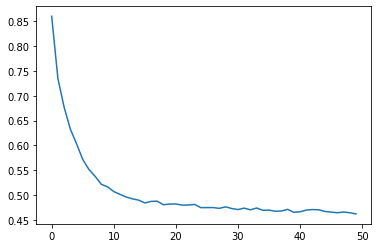

In [106]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [107]:
# X_test 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 예측 결과 출력
y_pred

134/134 [==============================] - 0s 1ms/step


array([[0.5408057 ],
       [0.03620268],
       [0.96230537],
       ...,
       [0.8691489 ],
       [0.76534176],
       [0.66572136]], dtype=float32)

In [109]:
submission = pd.read_csv("C:\\Users\\김승호\\spaceship-titanic\\sample_submission.csv")
preds = [p[0] >= 0.5 for p in y_pred]
submission['Transported'] = preds
submission.to_csv("C:\\Users\\김승호\\spaceship-titanic\\second_submission.csv",index=False)

In [51]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.BatchNormalization())

model.add(layers.Conv1D(32, kernel_size=5, activation='relu', padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01),
                       kernel_initializer='he_normal'))

model.add(layers.BatchNormalization())

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 8, mode = 'auto')


history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, 
                    epochs=100, 
                    batch_size=16,
                    validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val),
                    callbacks = [early_stopping]
                   )


Epoch 1/100
109/109 [==============================] - 3s 12ms/step - loss: nan - binary_accuracy: 0.5144 - val_loss: nan - val_binary_accuracy: 0.4963
Epoch 2/100
109/109 [==============================] - 1s 12ms/step - loss: nan - binary_accuracy: 0.4965 - val_loss: nan - val_binary_accuracy: 0.4963
Epoch 3/100
109/109 [==============================] - 2s 14ms/step - loss: nan - binary_accuracy: 0.4965 - val_loss: nan - val_binary_accuracy: 0.4963
Epoch 4/100
109/109 [==============================] - 2s 14ms/step - loss: nan - binary_accuracy: 0.4965 - val_loss: nan - val_binary_accuracy: 0.4963
Epoch 5/100
101/109 [==========================>...] - ETA: 0s - loss: nan - binary_accuracy: 0.4938

KeyboardInterrupt: 

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수


for n in range(10,101,10):
    for j in range(10,51,5):
        clf = RandomForestClassifier(n_estimators=n, max_depth=j,random_state=0)
        clf.fit(X_train,y_train)

        predict1 = clf.predict(X_val)
        print('하이퍼 파라미터 k,d : (',n,j,')')
        print('정확도 : ',accuracy_score(y_val,predict1))
        print('=======================================')

하이퍼 파라미터 k,d : ( 10 10 )
정확도 :  0.7728253055355859
하이퍼 파라미터 k,d : ( 10 15 )
정확도 :  0.7739755571531273
하이퍼 파라미터 k,d : ( 10 20 )
정확도 :  0.7725377426312006
하이퍼 파라미터 k,d : ( 10 25 )
정확도 :  0.77196261682243
하이퍼 파라미터 k,d : ( 10 30 )
정확도 :  0.77196261682243
하이퍼 파라미터 k,d : ( 10 35 )
정확도 :  0.77196261682243
하이퍼 파라미터 k,d : ( 10 40 )
정확도 :  0.77196261682243
하이퍼 파라미터 k,d : ( 10 45 )
정확도 :  0.77196261682243
하이퍼 파라미터 k,d : ( 10 50 )
정확도 :  0.77196261682243
하이퍼 파라미터 k,d : ( 20 10 )
정확도 :  0.7787203450754853
하이퍼 파라미터 k,d : ( 20 15 )
정확도 :  0.7800143781452192
하이퍼 파라미터 k,d : ( 20 20 )
정확도 :  0.784040258806614
하이퍼 파라미터 k,d : ( 20 25 )
정확도 :  0.7768511861969806
하이퍼 파라미터 k,d : ( 20 30 )
정확도 :  0.7768511861969806
하이퍼 파라미터 k,d : ( 20 35 )
정확도 :  0.7768511861969806
하이퍼 파라미터 k,d : ( 20 40 )
정확도 :  0.7768511861969806
하이퍼 파라미터 k,d : ( 20 45 )
정확도 :  0.7768511861969806
하이퍼 파라미터 k,d : ( 20 50 )
정확도 :  0.7768511861969806
하이퍼 파라미터 k,d : ( 30 10 )
정확도 :  0.779726815240834
하이퍼 파라미터 k,d : ( 30 15 )
정확도 :  0.78332135154

XGBoost(Extreme Gradient Boosting)는 GBM(Gradient Boosting Machine) 기반의 앙상블 학습 알고리즘 중 하나로, 다양한 데이터 분류 및 회귀 문제에 대해 높은 성능을 보이고 있습니다.

XGBoost의 주요 특징은 다음과 같습니다.

* Regularization: L1, L2 regularization 및 max depth 등을 통해 overfitting 방지
* Tree Pruning: 불필요한 가지 제거를 통한 효율적인 모델 생성
* Handling Missing Values: 결측치 처리 기능 제공
* Cross-Validation: 교차 검증 기능 제공
* Parallel Processing: 멀티코어 CPU를 이용한 병렬처리

하이퍼파라미터 세팅은 다음과 같은 것들이 있습니다.

* n_estimators: 생성할 tree의 개수
* max_depth: 트리의 깊이
* learning_rate: 각 트리마다 가중치를 얼마나 적용할지를 결정하는 파라미터
* gamma: loss function의 값이 얼마나 감소해야 leaf node를 생성할 것인지 결정하는 파라미터
* subsample: 데이터를 샘플링하는 비율
* colsample_bytree: 각 tree 생성 시, feature를 샘플링하는 비율
* reg_alpha: L1 regularization 계수
* reg_lambda: L2 regularization 계수

In [78]:
!pip install xgboost

In [82]:
from xgboost import XGBClassifier

# 모델 선언 예시
model = XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=25, random_state = 32)
model.fit(X_train, y_train)
y_pred = model.predict(X_val) 

# 예측 라벨과 실제 라벨 사이의 정확도 측정
accuracy_score(y_pred, y_val) 

0.78058950395399

In [92]:
X_train.shape


(1738, 15)

In [120]:
import xgboost as xgb

# X_train, y_train, X_val, y_val 데이터가 있다고 가정합니다.
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'max_depth': 6,
    'eta': 0.01,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'early_stopping_rounds': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# 모델 학습
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,
    evals=[(dtrain, 'train'), (dval, 'val')],
    verbose_eval=50
)

# 모델 예측
y_pred = model.predict(xgb.DMatrix(X_test))

[02:39:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.88369	val-auc:0.87393
[50]	train-auc:0.91092	val-auc:0.88745
[100]	train-auc:0.91695	val-auc:0.89137
[150]	train-auc:0.92092	val-auc:0.89274
[200]	train-auc:0.92506	val-auc:0.89451
[250]	train-auc:0.92930	val-auc:0.89665
[300]	train-auc:0.93314	val-auc:0.89799
[350]	train-auc:0.93642	val-auc:0.89894
[400]	train-auc:0.93924	val-auc:0.89989
[450]	train-auc:0.94169	val-auc:0.90064
[500]	train-auc:0.94382	val-auc:0.90109
[550]	train-auc:0.94619	val-auc:0.90154
[600]	train-auc:0.94820	val-auc:0.90189
[650]	train-auc:0.95028	val-auc:0.90210
[700]	train-a

In [121]:
# 예측 결과 출력
y_preds= [p >= 0.5 for p in y_pred]

submission = pd.read_csv("C:\\Users\\김승호\\spaceship-titanic\\sample_submission.csv")

submission['Transported'] = y_preds
submission.to_csv("C:\\Users\\김승호\\spaceship-titanic\\xgboost2_submission.csv",index=False)

In [113]:
y_pred[1]

0.0017215164

In [89]:
len(y_val)

6955

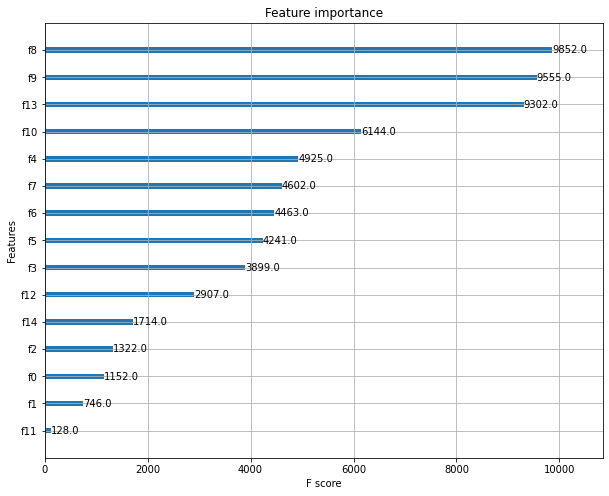

In [122]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(model, ax=ax)
plt.show()

# 여기서 (f+'숫자') 조합은, 원래 df의 column의 index와 동일하다.

In [133]:
importance = model.get_score(importance_type='gain')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
important_column_index = [int(f[1:]) for f, _ in importance]


In [138]:
for i,ind in enumerate(important_column_index) :
    print(i,'번째 중요 변수 : ',df.columns[ind])


0 번째 중요 변수 :  CryoSleep
1 번째 중요 변수 :  HomePlanet
2 번째 중요 변수 :  spend_fillna_0
3 번째 중요 변수 :  deck
4 번째 중요 변수 :  Spa
5 번째 중요 변수 :  FoodCourt
6 번째 중요 변수 :  side
7 번째 중요 변수 :  VRDeck
8 번째 중요 변수 :  ShoppingMall
9 번째 중요 변수 :  RoomService
10 번째 중요 변수 :  Destination
11 번째 중요 변수 :  num
12 번째 중요 변수 :  group
13 번째 중요 변수 :  last_name
14 번째 중요 변수 :  VIP_fill_na_False


# 왜 내가 제일 중요하다 생각했던 group이랑 VIP 가 중요도가 이렇게 낮지?

My Q) 

위는 XGboost 방식으로 계산한 변수 중요도야. 그런데 조금 궁금한게, VIP_fill_na_False 변수가 True일 경우, 사례는 적지만  target이 true인 경향이 60%로 매우 높았고, VIP_fill_na_False 변수가 False일 경우, 사례는 매우 많지만 target이 true인 경향이 49%로, VIP_fill_na 변수가 타겟변수와 유의미한 상관관계를 가질 것으로 예측했고, 실제 corr로 계산한 피어슨 상관계수도 타 변수에 비해 어느정도 높았는데 왜 예측에서 쓰이지 않은걸까? 네가 생각하는 이유를 설명해줘

<br>

Chat gpt A) 

VIP_fill_na_False 변수가 타겟 변수와 상관관계가 높다고 해서 반드시 모델에 반영되는 것은 아닙니다. 변수 중요도는 해당 변수가 모델 예측에 얼마나 중요한 역할을 하는지를 나타내는 지표일 뿐, 실제로 모델에서 사용되는 변수와 중요도가 높은 변수가 일치하지 않을 수도 있습니다.

또한, VIP_fill_na_False 변수가 True일 경우 target이 true인 경향이 높다고 하더라도, 이 변수 자체가 다른 변수와 중복되거나 정보의 양이 적어서 모델에서 더이상 유의미한 변수가 아닐 수도 있습니다. 따라서 변수 중요도만으로는 모델 예측 결과를 충분히 설명할 수 없습니다.

만약 VIP_fill_na_False 변수가 모델 예측에 미치는 영향을 확인하고 싶다면, 이 변수를 제외한 다른 변수들과 함께 모델을 학습하고 변수 중요도를 계산해보는 것이 좋습니다. 이를 통해 VIP_fill_na_False 변수의 유의미성을 다시한번 확인할 수 있습니다.
